# Project Description:
A project from Banking domain containing customer demographic information, the customer relationship with the bank and the customer response to the last personal loan campaign.

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Data Description:

The file **Bank_Personal_Loan_Modelling.csv** contains data on 5000 customers. The data include customer demographic information alongwith the customer's relationship with the bank and customer response to the last personal loan campaign. The various attributes are discussed as below:,
   
**ID:** This column contains the Customer ID. Each ID is specific to a customer.

**Age:** This column contains the age of the customer ranging from 23 to 67.

**Experience:** This column contains the data how much years of professional experience the customer have. The values ranges from -3 to 43.

**Income:** This column contains the annual income of the customer. It ranges from 8 thousand dollars to 224 thousand dollars.

**ZIP Code:** This column contains customer's home address ZIP code.


**Family:** It conatins the family size of the customer with value ranging from 1 to 4.

**CCAvg:** It contains the average spending on credit cards per month. It ranges from 0 thousand dollars to 10 thousand dollars.

**Education Level:** This column contains the education Level of the customers. Here only three level of education are considered - Undergrad (depicted by 1 in the file), Graduate (depicted by 2 in the file) and Advanced/ Professional (depicted by 3 in the file).

**Mortgage:** It contains the value of the house in mortgage (if any) with values ranging from 0 thousand dollars (indicating that the customer's house is 
not on mortgage) to 635 thousand dollars.

**Personal Loan:** This column contains the response of the customer whether it accepted the personal loan offered in the last campaign or not. The responses are stored as 0 (didn't accepted the loan when offered in the last campaign) and 1 (accepted the loan when offered in the last campaign).

**Securities Account:** This column contains the response whether the customer have a securities account with the bank or not. Here 0 indicates that the customer doesn't have a securities account and 1 indicates he does have.

**CD Account:** This column contains the response whether the customer have a certificate of deposit (CD) account with the bank or not. Here 0 indicates that the customer doesn't have a CD account and 1 indicates he does have.

**Online:** This column contains the response whether the customer avails internet banking facilities or not. Here 0 indicates that the customer doesn't uses internet banking facilities and 1 indicates he does uses.

**CreditCard:** This column contains information whether the customer uses a credit card issued by Universal Bank or not. Here 0 indicates that the customer doesn't uses a credit card and 1 indicates he does uses."

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### Read the csv file to form a dataframe

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/02. Supervised Machine Learning/Bank_Personal_Loan_Modelling.csv"


In [5]:
bank_data = pd.read_csv(path)
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Shape of the data

In [6]:
bank_data.shape

(5000, 14)

The two-dimensional dataframe i.e., bank_data consists of 5000 rows and 14 columns.

#### Dataframe of each attribute

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the attributes contains numerical values.

#### To check presence of missing values

In [8]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

None of the columns have null values.

### Data distribution in each attribute

#### Finding unique value in each attribute

In [9]:
bank_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

 **ID** have 5000 unique values, thus signifying that each customer has a unique ID. Columns **Personal Loan**,**Securities Account**, **CD Account**, **Online**, **Credit Card** each have two values.

As attributes **ID** and **ZIP Code** are just numbers of series, so we can drop them from our further analysis.

In [10]:
bank_data.drop('ID', axis = 1, inplace = True)
bank_data.drop('ZIP Code', axis = 1, inplace = True)
bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### 5 point summary of numerical attributes

In [11]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


The numerical attributes are summarised in the following manner:

i. **Age:** There are 5000 records with a mean value of 45.3384 years old. The minimum and maximum age of the persons taken under observation is 23 and 67 years old respectively. 25% of people are below 35 years of age, 50% of people are below 45 years of age whereas 75% of people are under 55 years of age. Also, the observations differ from the mean value by 11.463166

ii. **Experience:** There are 5000 records with a mean value of 20.1046 years. The minimum and maximum years of the experience the customers have are -3 and 43 years respectively. 25% of people have experience below 10 years, 50% of people have below 20 years of experience and 75% of people have an experience less than 30 years. Also, the observations differ from the mean value by 11.467954 years

iii. **Income:** There are 5000 records with a mean earning of 73.7742 thousand dollars. The minimum and maximum income of the customers taken under observation are 8000 and 224,000 dollars respectively. 25% of people have earnings below 39000 dollars, 50% of people earns below 64000 dollars whereas 75% of people earns under 98,000 dollars. Also, the observations differ from the mean value by 46.033729 thousand dollars

iv. **Family:** There are 5000 records with a mean family size of 2.3964. The minimum and maximum family size of the persons taken under observation is 1 and 4 respectively

v. **CCAvg:** There are 5000 records with a mean credit card spending of 1.937938 thousand dollars. The credit card spendings by the persons taken under observation ranges from 0 to 10 thousand dollars. 25% of people spends below 0.7 thousand dollars, 50% of people spends below 1.5 thousand dollars whereas 75% of people spends under 2.5 thousand dollars. Also, the observations differ from the mean value by 1.747659 thousand dollars

vi. **Mortgage:** There are 5000 records with a mean mortgage value of 56.4988 thousand dollars. The amount of mortgage ranges from 0 to 635 thousand dollars. It is clear that there are huge number of customers that aren't having mortgage value on their home. Also, the observations differ from the mean value by 101.713802 thousand dollars.

Apart from these, there are attributes like **Education** which suggests that maximum number of customers had achieved Undergrad level of education. From attribute **Personal Loan, Securities Account and CD Account** it is clear that quite a small number of customers had accepted personal loans, have securities account and certificate of deposit account in the bank respectively. From attribute **Online** it can be inferred that the number of customers using internet banking facilties is slightly more than the ones not using it.

Since, from the above we can see that the attribute **Experience** have some negative values. So, lets replace the negative values with the median.

In [12]:
# Finding the number of rows having negative Experience values:
bank_data[bank_data['Experience']<0]['Experience'].count()

52

In [13]:
# Replacing the negative value with the median of the column:
exp_med = bank_data.loc[:,'Experience'].median()
bank_data.loc[:,'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace = True)

In [14]:
# To check if there is any rows with negative values:
any(bank_data['Experience'] < 0)

False

Thus, there isn't any records having negative values for **Experience**.

#### 5 point summary after removing the negative values from **Experience**

In [15]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Univariate Analysis:

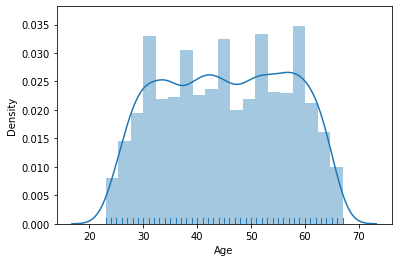

In [16]:
# plotting of 'Age':
sns.distplot(bank_data['Age'], rug = True)

From the above plot it seems that the curve is fairly symmetrical. A large chunk of the customers have their age in the range of 30-60 years.

In [17]:
# measure of skewness of 'age':
bank_data['Age'].skew()

-0.02934068151284029

**Negative skew** refers to a longer or fatter tail on the left side of the distribution, while **positive skew** refers to a longer or fatter tail on the right. The mean of positively skewed data will be greater than the median.

A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

The curve is slightly **negatively skewed**.

In [18]:
import pandas as pd

 

dataVal = [(10,20,30,40,50,60,70),

           (10,10,40,40,50,60,70),

           (10,20,30,50,50,60,80)]

dataFrame = pd.DataFrame(data=dataVal);

skewValue = dataFrame.skew(axis=1)

 

print("DataFrame:")

print(dataFrame)

 

print("Skew:")

print(skewValue)

DataFrame:
    0   1   2   3   4   5   6
0  10  20  30  40  50  60  70
1  10  10  40  40  50  60  70
2  10  20  30  50  50  60  80
Skew:
0    0.000000
1   -0.340998
2    0.121467
dtype: float64


https://pythontic.com/pandas/dataframe-computations/skew

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.

A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.

A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.


https://www.investopedia.com/terms/s/skewness.asp
The **mean of positively skewed data will be greater than the median**. In a distribution that is negatively skewed, the exact opposite is the case: the m**ean of negatively skewed data will be less than the median**. If the data graphs symmetrically, the distribution has zero skewness, regardless of how long or fat the tails are.

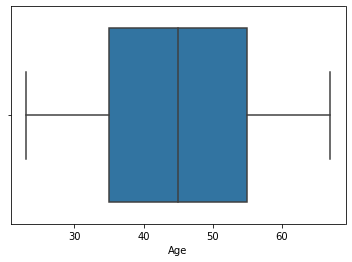

In [19]:
# presence of outliers in 'age':
sns.boxplot(bank_data['Age'])

From the above plot it is clear that the attribute **'Age'** doesn't have any outliers.

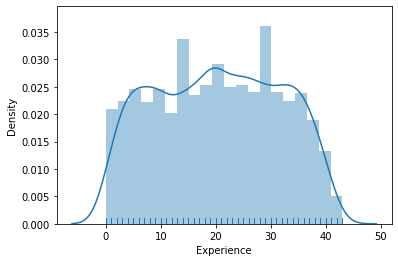

In [20]:
# plotting of 'Experience':
sns.distplot(bank_data['Experience'], rug = True)

From the plot it is clear that the curve is fairly symmetrical. Very less people with higher experience exists.

In [21]:
# measure of skewness of 'Experience':
bank_data['Experience'].skew()

-0.01409975101962344

The curve is slightly negatively skewed.

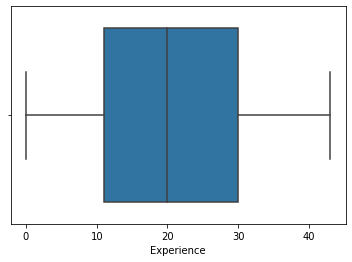

In [22]:
# presence of outliers in 'Experience':
sns.boxplot(bank_data['Experience'])

From the above plot it is clear that **'Experience'** doesn't have any outliers.

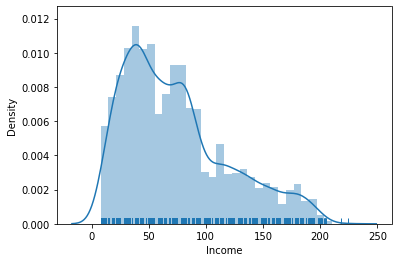

In [23]:
# plotting of 'Income':
sns.distplot(bank_data['Income'], rug = True)

From the graph it is clear that majority of the customers have income between 45,000 to 55,000 dollars.

In [24]:
# measure of skewness of 'Income':
bank_data['Income'].skew()

0.8413386072610816

A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

The curve is positively skewed.

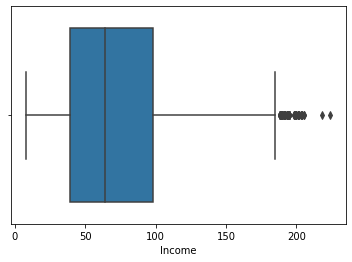

In [25]:
# presence of outliers in 'Income':
sns.boxplot(bank_data['Income'])

There are some outliers in **'Income'**. The number of outliers can be calculated as:

In [26]:
inc_25 = np.percentile(bank_data['Income'], 25)
inc_75 = np.percentile(bank_data['Income'], 75)
iqr_inc = inc_75 - inc_25
cutoff_inc = 1.5 * iqr_inc
low_lim_inc = inc_25 - cutoff_inc
upp_lim_inc = inc_75 + cutoff_inc

outlier_inc = [x for x in bank_data['Income'] if x < low_lim_inc or x > upp_lim_inc]
print("The number of outliers in 'Income' out off 5000 records are:", len(outlier_inc))

The number of outliers in 'Income' out off 5000 records are: 96


Thus, there are 96 customers having extreme Income.

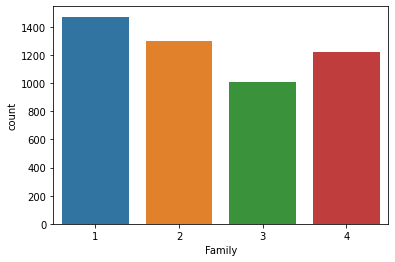

In [27]:
# plotting of 'Family':
sns.countplot(bank_data['Family'])

From the above plot it is clear that most of the customers are single. Whereas, the share of customers having family size of 3 is the least.

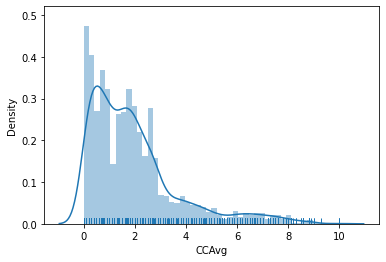

In [28]:
# plotting of 'CCAvg':
sns.distplot(bank_data['CCAvg'], rug = True)

From the above plot, it is clear that most of the customers have an average spending of 0 to 2000 dollars per month on their credit card.

In [29]:
# measure of skewness of 'CCAvg':
bank_data['CCAvg'].skew()

1.5984433366678663

A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

The curve is positively skewed.

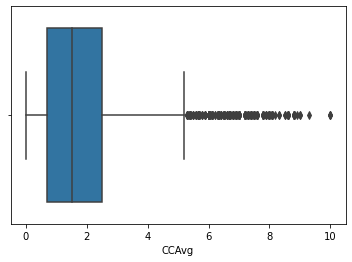

In [30]:
# presence of outliers in 'CCAvg':
sns.boxplot(bank_data['CCAvg'])

There are a lot of outliers in 'CCAvg'. The number of outliers can be calculated as:

In [31]:
cc_25 = np.percentile(bank_data['CCAvg'], 25)
cc_75 = np.percentile(bank_data['CCAvg'], 75)
iqr_cc = cc_75 - cc_25
cutoff_cc = 1.5 * iqr_cc
low_lim_cc = cc_25 - cutoff_cc
upp_lim_cc = cc_75 + cutoff_cc

outlier_cc = [x for x in bank_data['CCAvg'] if x < low_lim_cc or x > upp_lim_cc]
print("The number of outliers in 'CCAvg' out off 5000 records are:", len(outlier_cc))

The number of outliers in 'CCAvg' out off 5000 records are: 324


Thus, 325 customers have extreme spendings on their credit card.

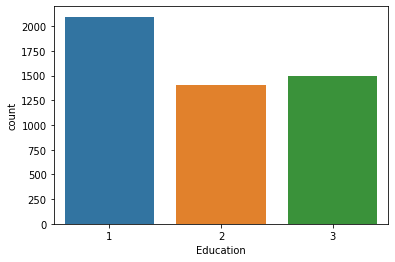

In [32]:
# plotting of 'Education':
sns.countplot(bank_data['Education'])

Maximum number of customers have completed education upto Undergrad level.

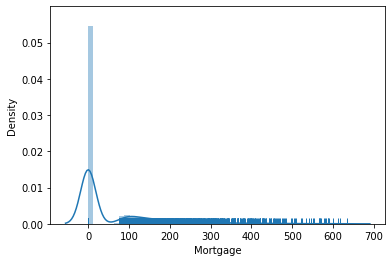

In [33]:
# plotting of 'Mortgage':
sns.distplot(bank_data['Mortgage'], rug = True)

Most of the customers don't have mortgages on their homes.

In [34]:
# measure of skewness of 'Mortgage':
bank_data['Mortgage'].skew()

2.1040023191079444

The curve is highly positively skewed.

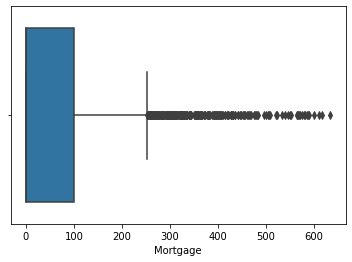

In [35]:
# presence of outliers in 'Mortgage':
sns.boxplot(bank_data['Mortgage'])

outliers are present in 'Mortgage'. The number of outliers can be calculated as:

In [36]:
mort_25 = np.percentile(bank_data['Mortgage'], 25)
mort_75 = np.percentile(bank_data['Mortgage'], 75)
iqr_mort = mort_75 - mort_25
cutoff_mort = 1.5 * iqr_mort
low_lim_mort = mort_25 - cutoff_mort
upp_lim_mort = mort_75 + cutoff_mort

outlier_mort = [x for x in bank_data['Mortgage'] if x < low_lim_mort or x > upp_lim_mort]
print("The number of outliers in 'Mortgage' out off 5000 records are:", len(outlier_mort))

The number of outliers in 'Mortgage' out off 5000 records are: 291


Thus, there are 291 customers that have extreme mortgage on their homes.

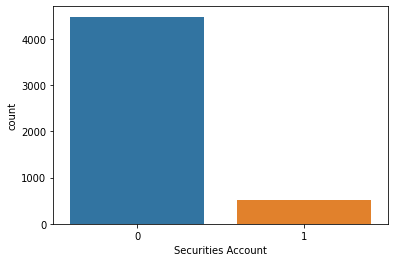

In [37]:
# plotting of 'Securities Account':
sns.countplot(bank_data['Securities Account'])

Majority of the customers don't have securities account with the bank.

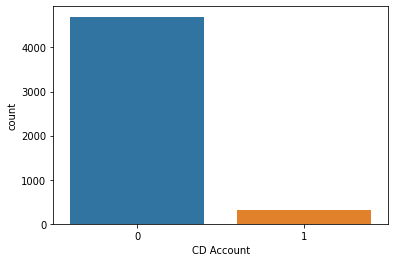

In [38]:
# plotting of 'CD Account':
sns.countplot(bank_data['CD Account'])

Majority of the customers don't have CD account with the bank.

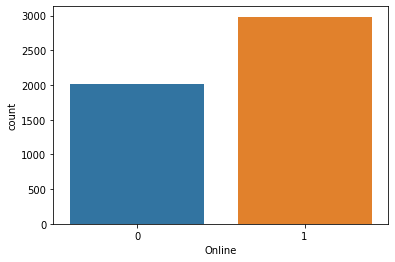

In [39]:
# plotting of 'Online':
sns.countplot(bank_data['Online'])

Number of customers using internet banking facilities is more than the ones not using it.

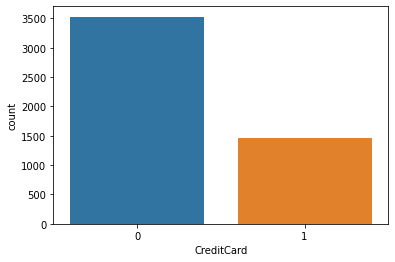

In [40]:
# plotting of 'CreditCard':
sns.countplot(bank_data['CreditCard'])

Majority of the customers don't use a credit card issued by UniversalBank.

#### Bivariate Analysis:

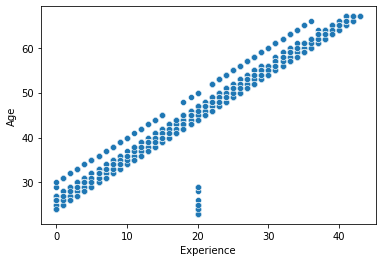

In [41]:
# plotting of 'Age' and 'Experience':
sns.scatterplot(bank_data['Experience'], bank_data['Age'])

**Experience** increases **Age** also increases, thus somewhat signifying a positive linear relationship.

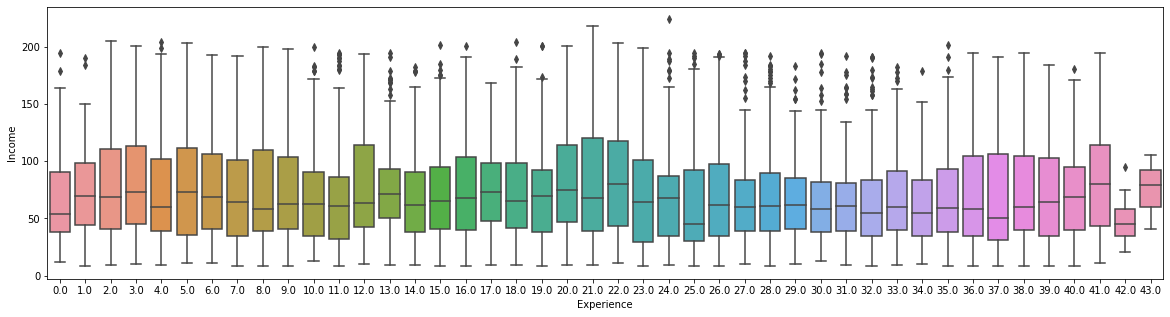

In [42]:
# plotting of 'Experience' and 'Income':
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Experience', y = 'Income', data = bank_data)

Customer having an **Experience** of 24 years earns most whereas customer having an **Experience** of 42 years earns the least among the observed customers.

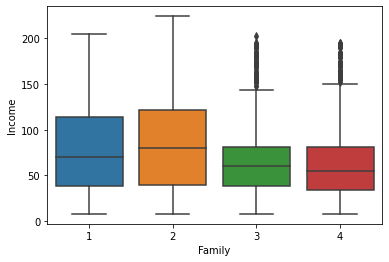

In [43]:
# plotting of 'Income' and 'Family':
sns.boxplot(x = 'Family', y = 'Income', data = bank_data)

The customer having a family size of 2 earns the most.

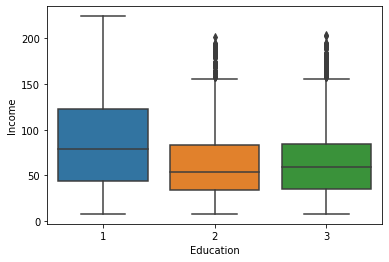

In [44]:
# plotting of 'Income' and 'Education':
sns.boxplot(x = 'Education', y = 'Income', data = bank_data)

Highest Income is earned by the customer who has achieved Undergrad level of education.

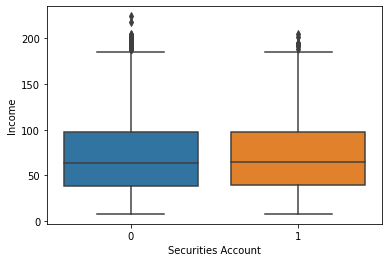

In [45]:
# plotting of 'Income' and 'Securities Account':
sns.boxplot(x = 'Securities Account', y = 'Income', data = bank_data)

Customer who has the highest annual Income doesn't have a Securities Account with the bank.

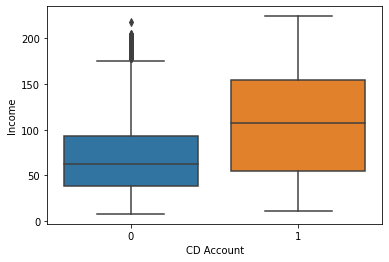

In [46]:
# plotting of 'CD Account' and 'Income':
sns.boxplot(x = 'CD Account', y = 'Income', data = bank_data)

Customer who has the highest annual income doesn't have a CD Account with the bank.

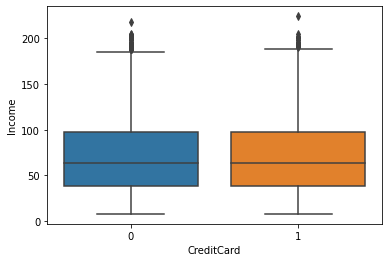

In [47]:
# plotting of 'CreditCard' and 'Income':
sns.boxplot(x = 'CreditCard', y = 'Income', data = bank_data)

Customer who has the highest annual Income doesn't uses a Credit Card issued by bank.

Multivariate Analysis:

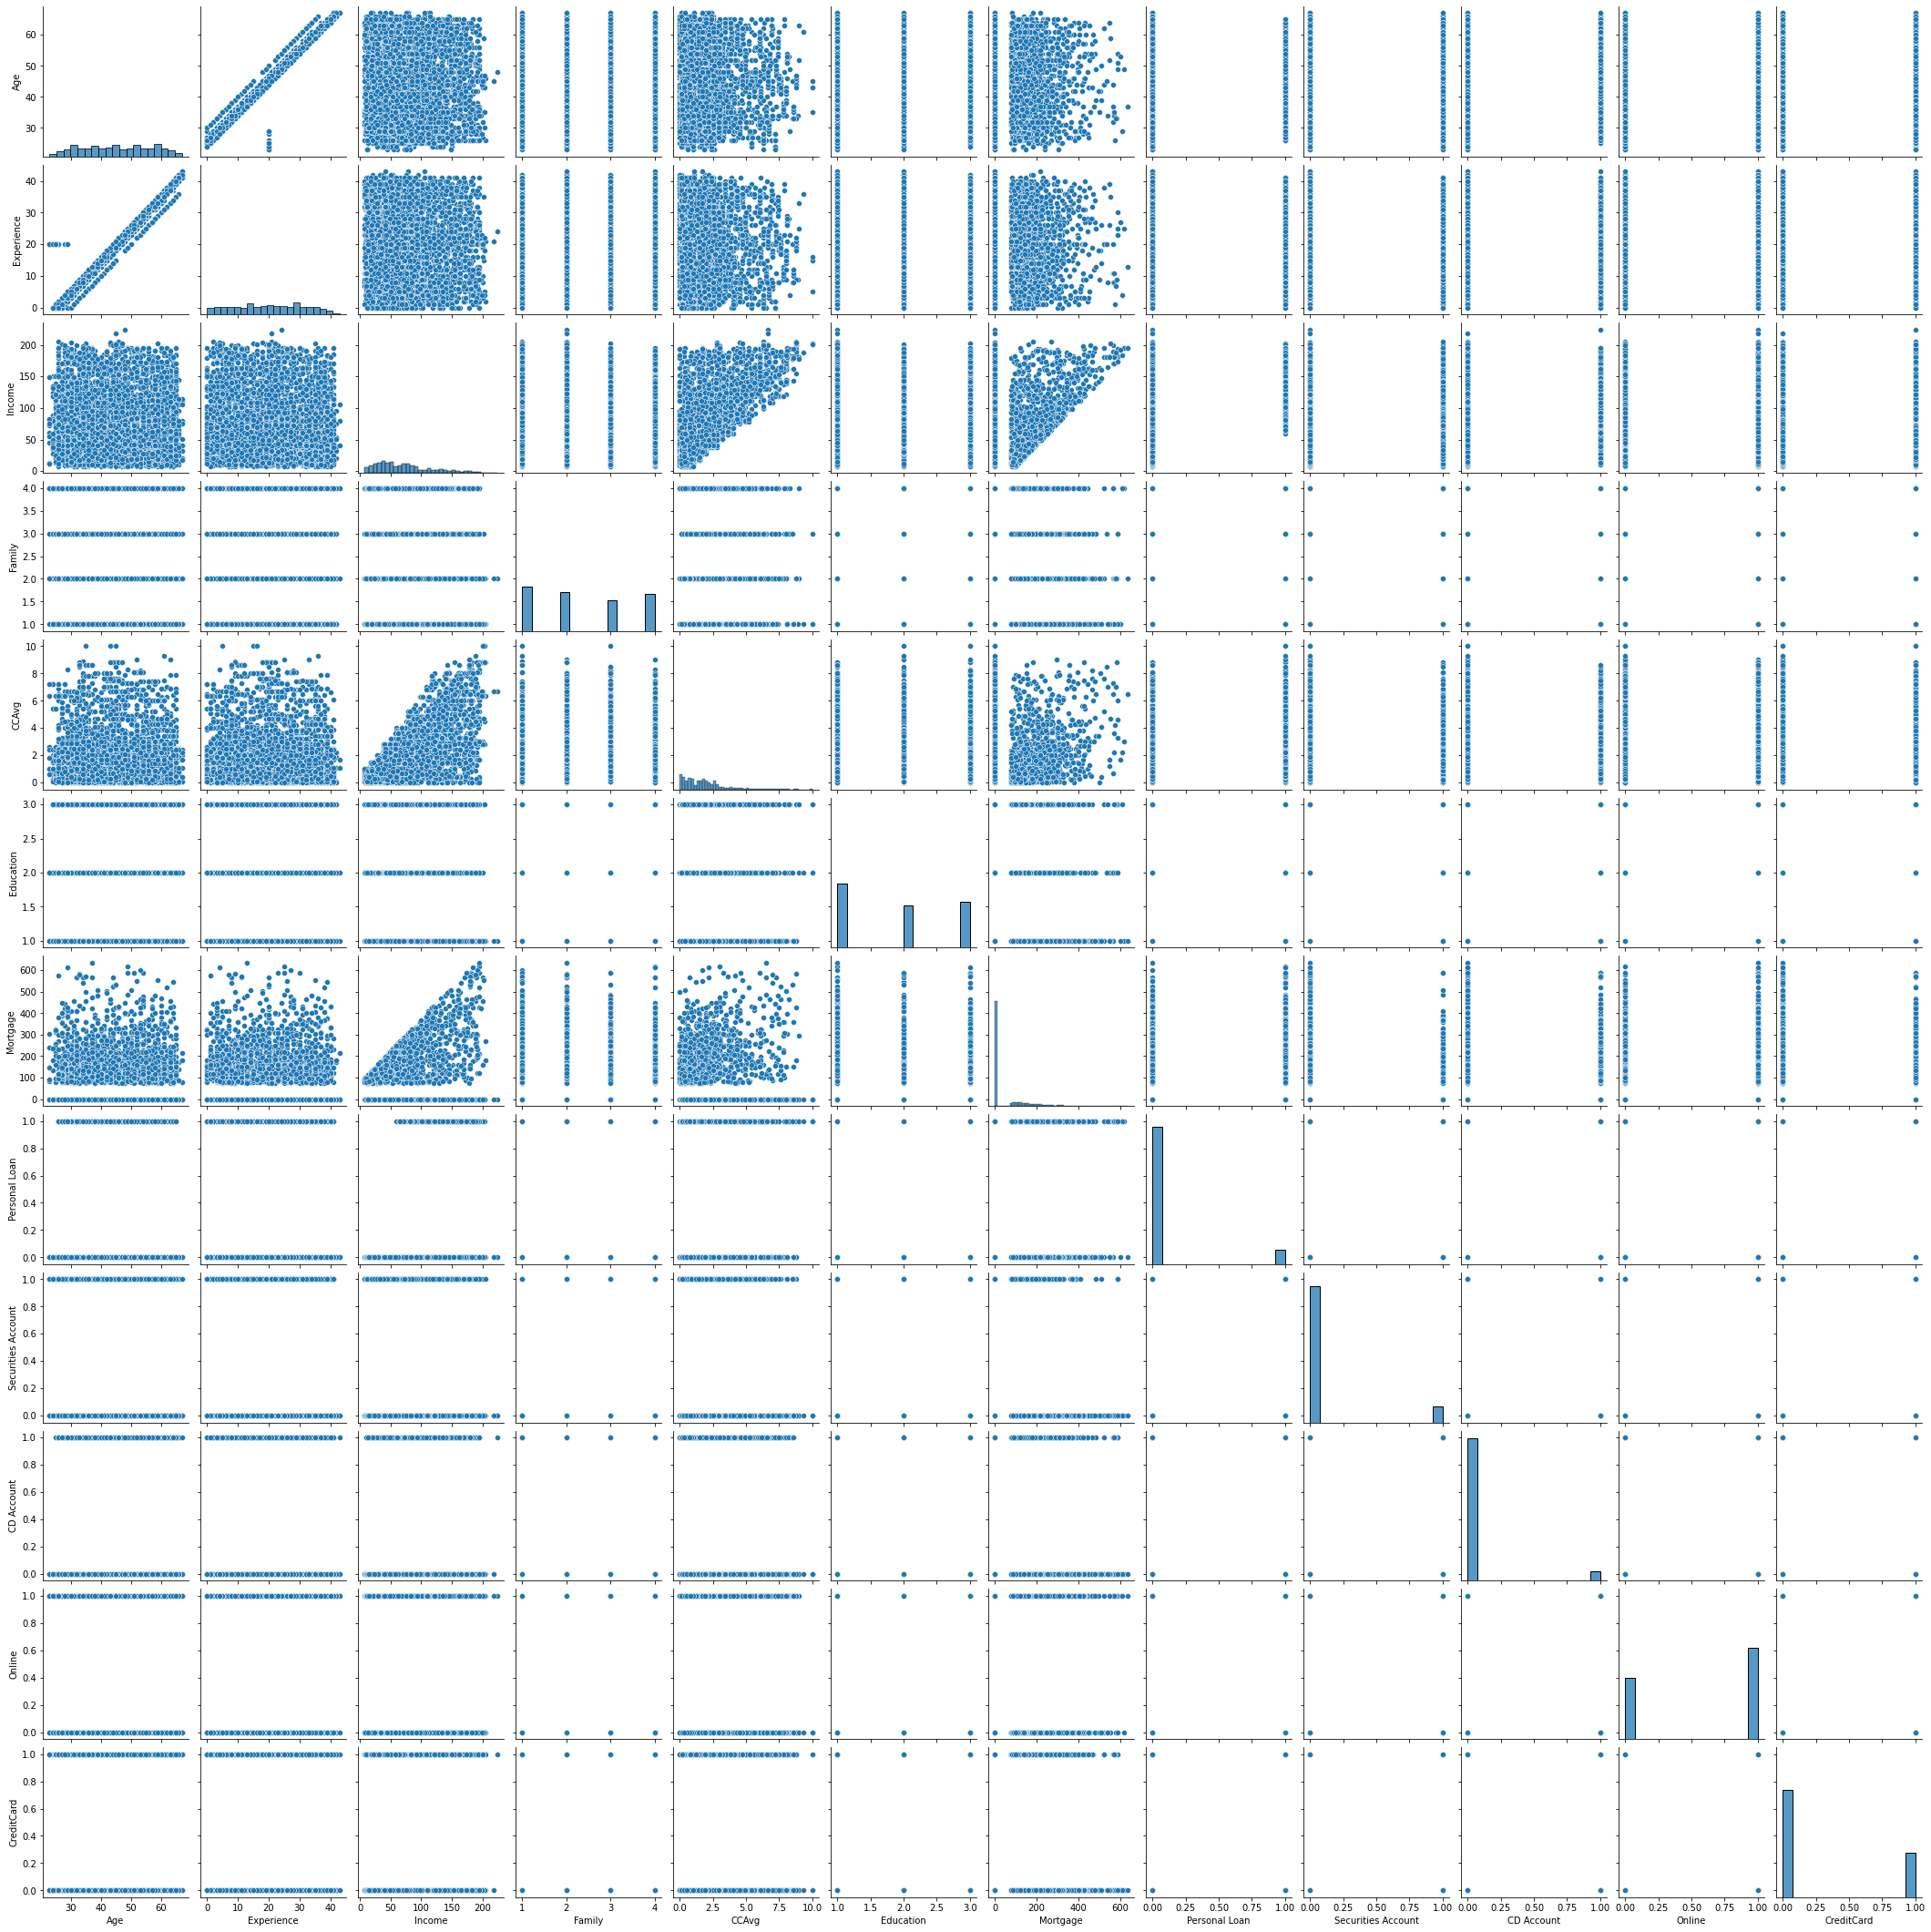

In [48]:
# pairplot
sns.pairplot(bank_data)

Most of the attributes (other than Age , Experience, CCAvg , income and Personal Loan) doesn't have any strong linear relationship between them.

## Get the target column distribution. Your comments. : Here, **Personal Loan** is the target variable.

#### Univariate Analysis

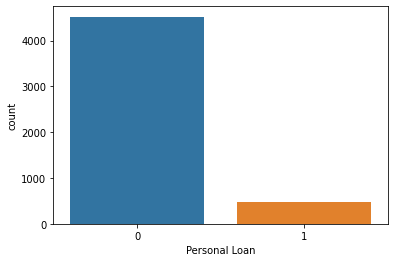

In [49]:
# plotting of 'Personal Loan':
sns.countplot(bank_data['Personal Loan'])

Majority of the observed customers didn't opted for Personal Loan.

#### Bivariate Analysis

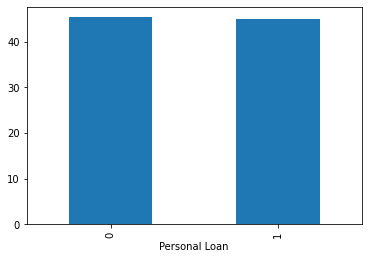

In [50]:
# calculating the mean 'Age' of the customers buying 'Personal Loan' and those who don't:
bank_data.groupby('Personal Loan')['Age'].mean().plot(kind = 'bar')

There isn't any difference in the mean age of the customers availing personal loan and customers who didn't availed Personal Loan. The y axis represents the mean of **Age**

In [51]:
print(bank_data.groupby('Personal Loan')['Age'].min())
print(bank_data.groupby('Personal Loan')['Age'].max())

Personal Loan
0    23
1    26
Name: Age, dtype: int64
Personal Loan
0    67
1    65
Name: Age, dtype: int64


***customers who didn't availed Personal Loan :***

minimum age = 23 

maximum age = 67

***customers who availed Personal Loan :***

minimum age = 26
maximum age = 65 

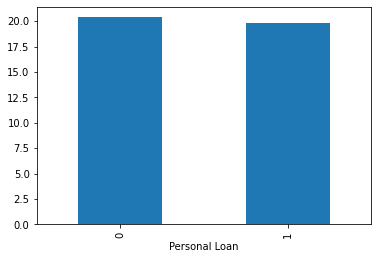

In [52]:
# calculation of mean value of 'Experience' of customers having 'Personal Loan' and not having it:
bank_data.groupby('Personal Loan')['Experience'].mean().plot(kind = 'bar')

Mean Experience of customers not availing Personal Loan is more than the customers that had availed Personal Loan

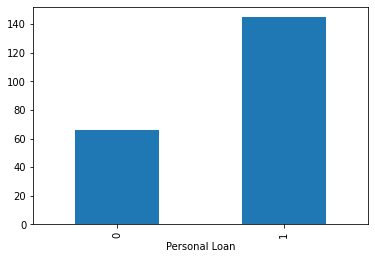

In [53]:
# calculating the mean value of 'Income' for the customers having 'Personal Loan' and those not having:
bank_data.groupby('Personal Loan')['Income'].mean().plot(kind = 'bar')

Mean annual income of the customers availing Personal Loan is much higher than the customers not availing Personal Loan. So,income can be a good indicator whether a customer will take Personal Loan or not, as high income suggests that a customer can avail Personal Loan. The same can be ascertained from the below graph:

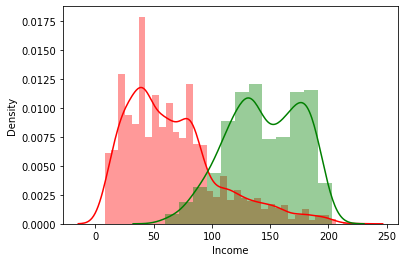

In [54]:
sns.distplot(bank_data[bank_data['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot(bank_data[bank_data['Personal Loan'] == 1]['Income'], color = 'g')

Cross tabulation can be given as:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


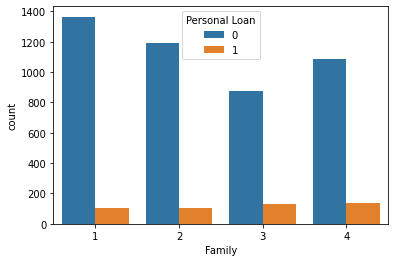

In [55]:
# plotting of 'Personal Loan' and 'Family':
fam = pd.crosstab(bank_data['Family'], bank_data['Personal Loan'])
print('Cross tabulation can be given as: ','\n', fam)
sns.countplot(bank_data['Family'], hue = bank_data['Personal Loan'])

The number of family members doesn't affect the probability of a customer whether he/she will avail Personal Loan or not.

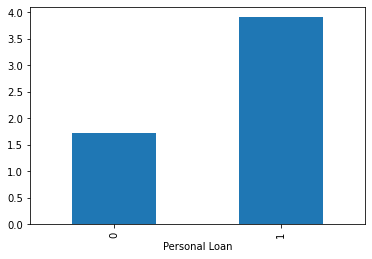

In [56]:
# calculating the mean value of 'CCAvg' for customers buying 'Personal Loan' and those who don't:
bank_data.groupby('Personal Loan')['CCAvg'].mean().plot(kind = 'bar')

Mean average spending on Credit Card per month by the customers availing Personal Loan is much higher than the customers not availing Personal Loan. So, average spending on Credit Card per month can also be a good indicator whether a customer will avail Personal Loan or not, as higher spendings indicate that a customer can avail Personal Loan. The same can be ascertained from the below graph:

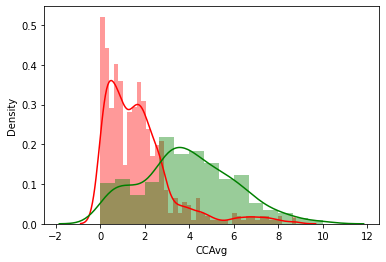

In [57]:
sns.distplot(bank_data[bank_data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(bank_data[bank_data['Personal Loan'] == 1]['CCAvg'], color = 'g')

Cross tabulation can be given as : 
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


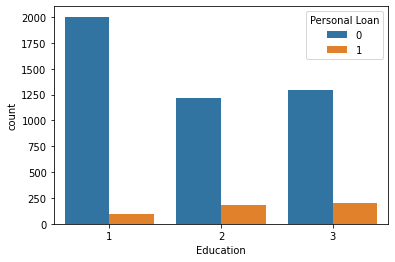

In [58]:
# plotting of 'Personal Loan' and 'Education':
edu = pd.crosstab(bank_data['Education'], bank_data['Personal Loan'])
print('Cross tabulation can be given as :', '\n', edu)
sns.countplot(bank_data['Education'], hue = bank_data['Personal Loan'])

Maximum customers who availed Personal Loan had achieved Advanced/Professional level of Education.

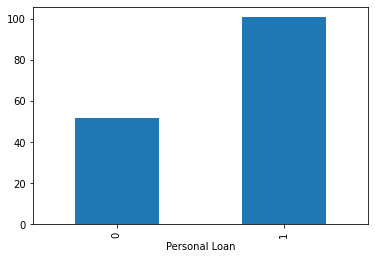

In [59]:
# calculating the mean value of 'Mortgage' for customers buying 'Personal Loan' as compared to those who don't:
bank_data.groupby('Personal Loan')['Mortgage'].mean().plot(kind = 'bar')

Mean mortgage value of the customers availing Personal Loan is much higher than the customers not availing Personal Loan. --58
https://github.com/ramanks19/AIML-Projects/blob/main/02.%20Supervised%20Machine%20Learning/Project%202%20-%20Supervised%20Learning_Banking.ipynb

https://raw.githubusercontent.com/ramanks19/AIML-Projects/main/02.%20Supervised%20Machine%20Learning/Project%202%20-%20Supervised%20Learning_Banking.ipynb

Cross tabulation is given as:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60


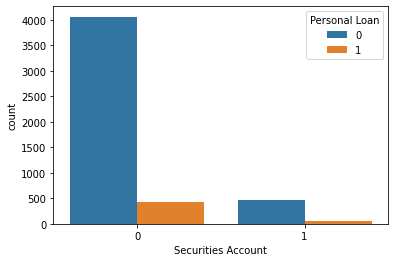

In [60]:
# plotting of 'Personal Loan' and 'Securities Account':
sec_acc = pd.crosstab(bank_data['Securities Account'], bank_data['Personal Loan'])
print('Cross tabulation is given as: ', '\n', sec_acc)
sns.countplot(bank_data['Securities Account'], hue = bank_data['Personal Loan'])

Majority of customers who had availed Personal Loan belong to the group who don't have Securities Account in the bank.

Cross tabulation is given as:  
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140


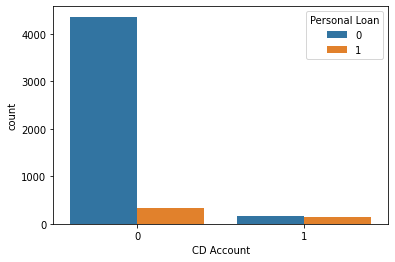

In [61]:
# plotting of 'Personal Loan' and 'CD Account':
cd_acc = pd.crosstab(bank_data['CD Account'], bank_data['Personal Loan'])
print('Cross tabulation is given as: ', '\n', cd_acc)
sns.countplot(bank_data['CD Account'], hue = bank_data['Personal Loan'])

Majority of customers who had availed Personal Loan belong to the group who don't have CD Account in the bank.

Cross tabulation is given as:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291


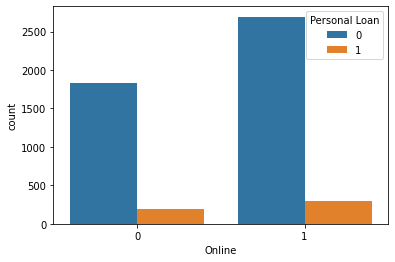

In [62]:
# plotting of 'Personal Loan' and 'Online':
online = pd.crosstab(bank_data['Online'], bank_data['Personal Loan'])
print('Cross tabulation is given as: ', '\n', online)
sns.countplot(bank_data['Online'], hue = bank_data['Personal Loan'])

Majority of customers who had availed Personal Loan belong to the group who use internet banking facilities.

Cross tabulation is given as:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143


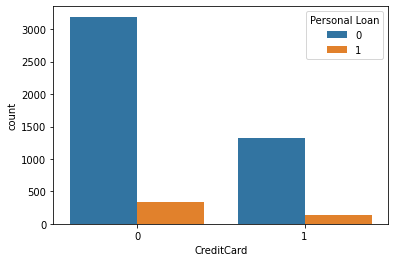

In [63]:
# plotting of 'Personal Loan' and 'CreditCard':
credit = pd.crosstab(bank_data['CreditCard'], bank_data['Personal Loan'])
print('Cross tabulation is given as: ', '\n', credit)
sns.countplot(bank_data['CreditCard'], hue = bank_data['Personal Loan'])

Majority of customers who had availed Personal Loan belong to the group who don't have a credit card issued by bank.

#### Multivariate Analysis:

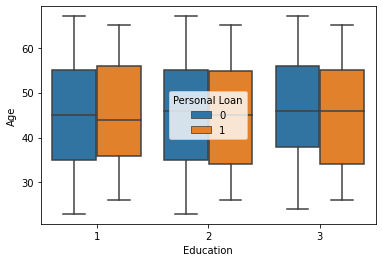

In [64]:
# plotting of 'Education', 'Age' and 'Personal Loan':
sns.boxplot(bank_data['Education'], bank_data['Age'], hue = bank_data['Personal Loan'])

Customer who availed Personal Loan have the same Age distribution irrespective of their Education.

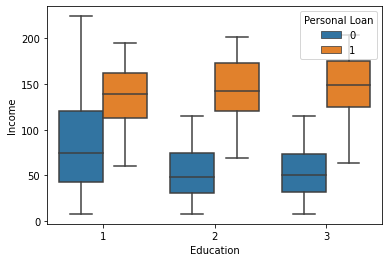

In [65]:
# plotting of 'Education', 'Income' and 'Personal Loan':
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = bank_data)

The boxplot reveals that Customers having Undergraduate Education have higher incomes. 

But customers who availed personal loans have the same income distribution irrespective of their Education.

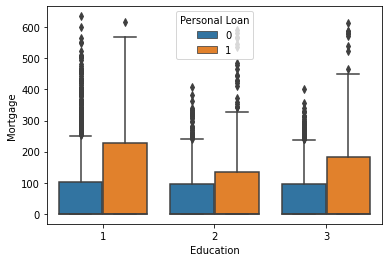

In [66]:
# plotting of 'Education', 'Mortgage' and 'Personal Loan':
sns.boxplot(x = 'Education', y = 'Mortgage', hue = 'Personal Loan', data = bank_data)

The boxplot reveals that customers having Undergraduate education have higher mortgage. 

It is also clear that maximum number of customers who availed Personal Loan have Undergraduate Education.

In [67]:
# calculating the correlation coefficient
corr = bank_data.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


(12.5, -0.5)

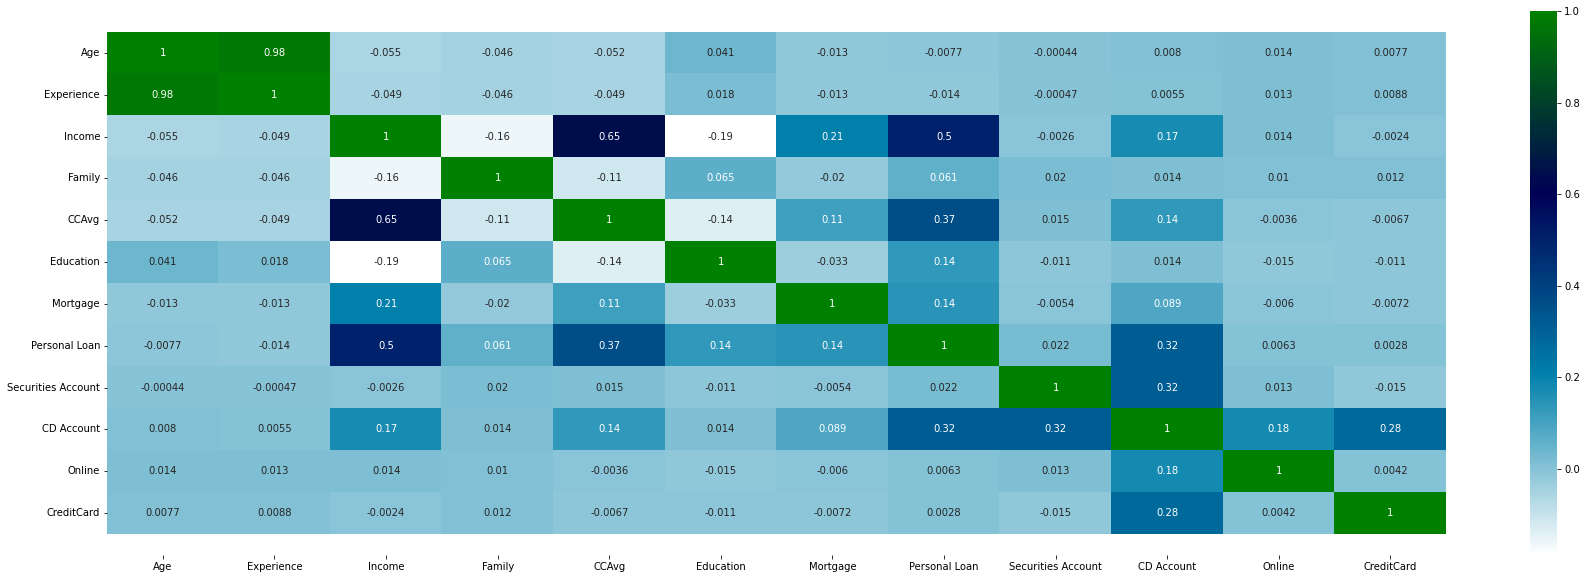

In [68]:
# plotting a heatmap
plt.figure(figsize = (30,10))
ax = sns.heatmap(corr, annot = True, cmap = "ocean_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From the above heatmap it is clear that **Age** and **Experience** are highly linearly correlated. The same was also observed in the pairplot. 

**Income** and **CCAvg** also depicts a slightly positive correlation between them.

#### Preparation of data for models

Out of all the mentioned attributes in the data sheet, we can neglect the following attribute:

**Experience**: As Experience is highly correlated with **Age (ρ = 0.98)**, so it can be neglected here.

In [69]:
# dropping 'Experience' from the dataframe:
bank_data.drop('Experience', axis = 1, inplace = True)
bank_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Splitting of Data into Training and Test Set in the ratio of 70:30 respectively

In [70]:
X = bank_data.drop('Personal Loan', axis = 1)
y = bank_data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Here, the independent variables are denoted by **'X'** and the predictor is represented by **'y'**.

### Using Different Classification models to predict the likelihood of a customer buying a personal loan. Also, print the Confusion Matrix. 

### Logistic Regression

In [71]:
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

LogisticRegression()

In [72]:
pred_log = LogReg_model.predict(X_test)
predictprob_log = LogReg_model.predict_proba(X_test)

In [73]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_log))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_log))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.86      0.48      0.61       149

    accuracy                           0.94      1500
   macro avg       0.90      0.73      0.79      1500
weighted avg       0.94      0.94      0.93      1500

Accuracy obtained from the given model is: 0.94


The accuracy obtained from the model is 94%. Apart from this the, Precision of this model (i.e., the proportion of predicted positives that are really positives) is 0.94.

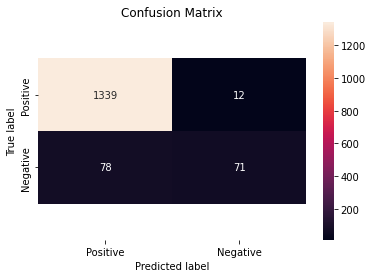

In [74]:
# Confusion Matrix:
cm_log = confusion_matrix(y_test, pred_log)

class_label = ['Positive', 'Negative']
df_cm_log = pd.DataFrame(cm_log, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_log, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 1339 records Positive which were actually positive and 12 records which were marked Positive but where actually Negative. Also, the model had correctly identified 71 records as Negative. However, the model had predicted 78 records as Negative which were actually Positive.

Although, we had got quite a high percentage of Accuracy and Precision we would still like as to see as to how the models will behave when the data is Standardized.

In [75]:
# standardization of the training and test data set
scaled_X_train = preprocessing.StandardScaler().fit_transform(X_train)
scaled_X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [76]:
LogReg_model_scaled = LogisticRegression()
LogReg_model_scaled.fit(scaled_X_train, y_train)

LogisticRegression()

In [77]:
pred_log_scaled = LogReg_model_scaled.predict(scaled_X_test)
predictprob_log_scaled = LogReg_model_scaled.predict_proba(scaled_X_test)

In [78]:
# print classification report and accuracy score:
print('Classification report for the model after scaling is given as:', '\n', classification_report(y_test, pred_log_scaled))
print('Accuracy obtained from the given model after scaling is:', accuracy_score(y_test, pred_log_scaled))

Classification report for the model after scaling is given as: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy obtained from the given model after scaling is: 0.9473333333333334


The accuracy and prediction obtained from this model after standardizing the data set is 94.8% and 0.96 respectively (which is a slight increase when compared to ones obtained through non-standardized dataset).

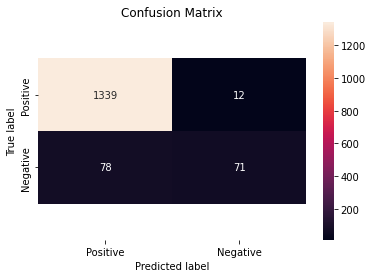

In [79]:
# Confusion Matrix:
cm_log_scale = confusion_matrix(y_test, pred_log_scaled)

class_label = ['Positive', 'Negative']
df_cm_log_scale = pd.DataFrame(cm_log_scale, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_log, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The results in the Confusion Matrix is same as that of obtained from non-standardized dataset.

### K-NN

In [80]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

The optimal number of neighbors is 3


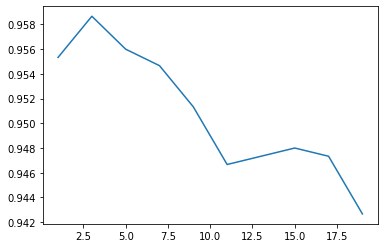

In [81]:
# Empty list to hold accuracy scores
ac_scores_knn = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_X_train, y_train)
    
    y_pred = knn.predict(scaled_X_test)
    
    scores = accuracy_score(y_test, y_pred)
    ac_scores_knn.append(scores)
    
MSE = [1 - x for x in ac_scores_knn]

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)

plt.plot(neighbors, ac_scores_knn)

So, here we will consider the value of k = 3.

In [82]:
knn_model = KNeighborsClassifier(n_neighbors = optimal_k, weights = 'uniform', metric = 'euclidean')
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [83]:
pred_knn = knn_model.predict(scaled_X_test)
predictprob_knn = knn_model.predict_proba(scaled_X_test)

In [84]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_knn))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_knn))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

Accuracy obtained from the given model is: 0.9586666666666667


The accuracy obtained from the model is 95.87%. Apart from this the, Precision of this model (i.e., the proportion of predicted positives that are really positives) is 0.96.

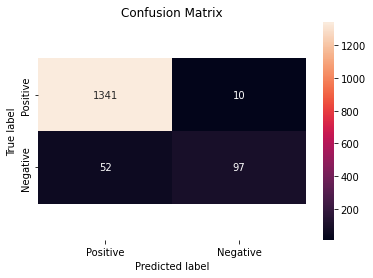

In [85]:
# Confusion Matrix:
cm_knn = confusion_matrix(y_test, pred_knn)

class_label = ['Positive', 'Negative']
df_cm_knn = pd.DataFrame(cm_knn, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_knn, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 1341 records Positive which were actually positive and 10 records as False Positive. Also, the model had correctly identified 97 records as Negative. However, the model had predicted 52 records as Negative which were actually Positive.

Naive Bayes

### Naive Bayes

In [86]:
naive_model = GaussianNB()
naive_model.fit(scaled_X_train, y_train)

GaussianNB()

In [87]:
pred_nb = naive_model.predict(scaled_X_test)
predictprob_nb = naive_model.predict_proba(scaled_X_test)

In [88]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_nb))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_nb))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500

Accuracy obtained from the given model is: 0.872


The accuracy obtained from the model is 87.2%. Apart from this the, Precision of this model (i.e., the proportion of predicted positives that are really positives) is 0.95.

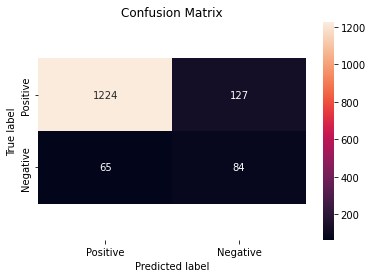

In [89]:
# Confusion Matrix:
cm_nb = confusion_matrix(y_test, pred_nb)

class_label = ['Positive', 'Negative']
df_cm_nb = pd.DataFrame(cm_nb, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_nb, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 1224 records as Positive which were actually positive and 127 records as False Positive. Also, the model had correctly identified 84 records as Negative. However, the model had predicted 65 records as False Negative.

### Give your reasoning on which is the best model in this case

Before deciding which model (Logistic Regression, KNN and Naive Bayes) is best lets summarise the results from each of the model. All the three models had predicted 1351 records as Positive and 149 records as Negative with varying amount of True Positive, True Negative, False Positive and False Negative.

**Logistic Regression:**

This algorithm provided an accuracy of 94% and a precision of 0.96 on standardized training and test data set. Apart from this, it also correctly predicted 1338 records as Positive and 76 records as negative. However it also predicted 13 records as Positive which were actually negative and 73 as Negative which were actually Positive.

**KNN (K-Nearest Neighbor):**

This algorithm provided an accuracy of 95.87 % and a precision of 0.96. Apart from this, it also correctly predicted 1341 records as Positive and 97 records as negative. However it also predicted 10 records as Positive which were actually negative and 52 as Negative which were actually Positive.

**Naive Bayes:**

This algorithm provided an accuracy of 87.2 % and a precision of 0.95. Apart from this, it also correctly predicted 1224 records as Positive and 84 records as negative. However it also predicted 127 records as Positive which were actually negative and 65 as Negative which were actually Positive.

Thus, we can see that KNN has the best accuracy among all the three algorithms that has been used here. Apart from these it had also identified the most number of True Positive Records and least False negative records.

**Thus, in this case we can say that KNN (K-Nearest Neighbor) is the best model out of the three.**